In [34]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [35]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather.csv")


In [36]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [37]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [38]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [39]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [40]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=False, errors="coerce")
df["Month"] = df["Date"].dt.month
def to_season(m):
    if pd.isna(m): return np.nan
    m = int(m)
    if m in [12,1,2]: return "summer"
    if m in [3,4,5]:  return "autumn"
    if m in [6,7,8]:  return "winter"
    return "spring"
df["Season"] = df["Month"].apply(to_season)

/tmp/ipython-input-265784065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=False, errors="coerce")
/tmp/ipython-input-265784065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Date"].dt.month
/tmp/ipython-input-265784065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [41]:
drop_cols = ["Date", "Location", "RainTomorrow", "RISK_MM"]  # 미래/누수 가능 or 식별자
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [42]:
# 3) 타깃/피처 분리
y = df["Rainfall"]
X = df.drop(columns=["Rainfall"])

In [43]:
cat_cols = [c for c in ["WindGustDir","WindDir9am","WindDir3pm","RainToday","Season"] if c in X.columns]
num_cols = [c for c in X.columns if c not in cat_cols]

In [44]:
numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
])
categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ],
    remainder="drop"
)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor


In [46]:

lr = TransformedTargetRegressor(
    regressor=Pipeline([
        ("prep", preprocess),
        ("reg", LinearRegression())
    ]),
    func=np.log1p, inverse_func=np.expm1, check_inverse=False
)

In [47]:
rf = TransformedTargetRegressor(
    regressor=Pipeline([
        ("prep", preprocess),
        ("reg", RandomForestRegressor(
            n_estimators=400, random_state=42, n_jobs=-1
        ))
    ]),
    func=np.log1p, inverse_func=np.expm1, check_inverse=False
)

In [48]:
dt = TransformedTargetRegressor(
    regressor=Pipeline([
        ("prep", preprocess),
        ("reg", DecisionTreeRegressor(random_state=42))
    ]),
    func=np.log1p, inverse_func=np.expm1, check_inverse=False
)


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

In [50]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)

TransformedTargetRegressor(check_inverse=False, func=<ufunc 'log1p'>,
                           inverse_func=<ufunc 'expm1'>,
                           regressor=Pipeline(steps=[('prep',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleImputer(strategy='median'))]),
                                                                                       ['MinTemp',
                                                                                        'MaxTemp',
                                                                                        'Evaporation',
                                                                                        'Sunshine',
                                                                                        'WindGustSpeed',
                                                                                        'WindSpeed9am',
                                                                                        'WindSpeed3pm',
                                                                                        'Humidity9am',
                                                                                        'Humidity3pm',
                                                                                        'Pressure9am',
                                                                                        'Pressure3pm',
                                                                                        'Cloud9am',
                                                                                        'Cloud3pm',
                                                                                        'Temp9am',
                                                                                        'Temp3pm',
                                                                                        'Month']),
                                                                                      ('cat',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('onehot',
                                                                                                        OneHotEncoder(handle_unknown='ignore',
                                                                                                                      sparse_output=False))]),
                                                                                       ['WindGustDir',
                                                                                        'WindDir9am',
                                                                                        'WindDir3pm',
                                                                                        'RainToday',
                                                                                        'Season'])])),
                                                     ('reg',
                                                      DecisionTreeRegressor(random_state=42))]))

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5     # squared=False 대체 (버전 호환)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return rmse, mae, r2

In [52]:
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
dt_pred = dt.predict(X_test)

lr_rmse, lr_mae, lr_r2 = metrics(y_test, lr_pred)
rf_rmse, rf_mae, rf_r2 = metrics(y_test, rf_pred)
dt_rmse, dt_mae, dt_r2 = metrics(y_test, dt_pred)

In [53]:
print("=== Regression Results (Rainfall, mm) ===")
print(f"LinearRegression        -> RMSE: {lr_rmse:.3f} | MAE: {lr_mae:.3f} | R^2: {lr_r2:.3f}")
print(f"RandomForestRegressor   -> RMSE: {rf_rmse:.3f} | MAE: {rf_mae:.3f} | R^2: {rf_r2:.3f}")
print(f"DecisionTreeRegressor   -> RMSE: {dt_rmse:.3f} | MAE: {dt_mae:.3f} | R^2: {dt_r2:.3f}")

# 베이스라인(항상 0mm 예측)도 비교
base_pred = np.zeros_like(y_test, dtype=float)
base_rmse, base_mae, base_r2 = metrics(y_test, base_pred)
print(f"Baseline (always 0 mm)  -> RMSE: {base_rmse:.3f} | MAE: {base_mae:.3f} | R^2: {base_r2:.3f}")

=== Regression Results (Rainfall, mm) ===
LinearRegression        -> RMSE: 4.947 | MAE: 1.538 | R^2: 0.318
RandomForestRegressor   -> RMSE: 4.573 | MAE: 1.587 | R^2: 0.417
DecisionTreeRegressor   -> RMSE: 5.616 | MAE: 2.015 | R^2: 0.121
Baseline (always 0 mm)  -> RMSE: 6.377 | MAE: 2.185 | R^2: -0.133


In [54]:
import matplotlib.pyplot as plt

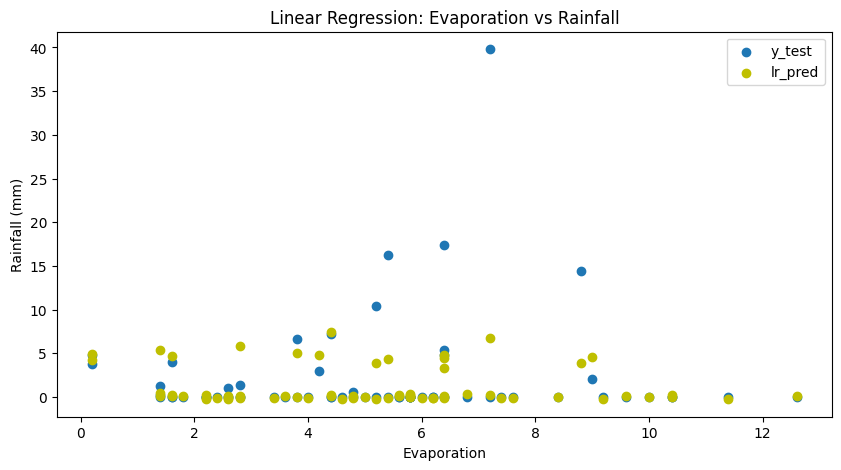

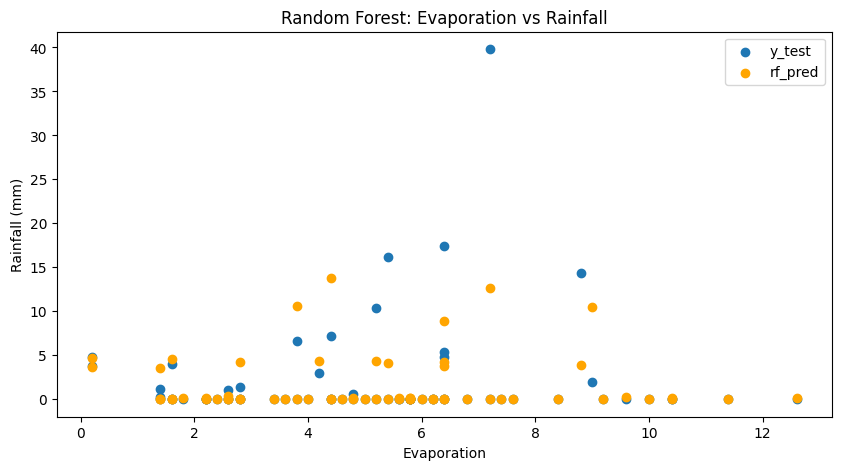

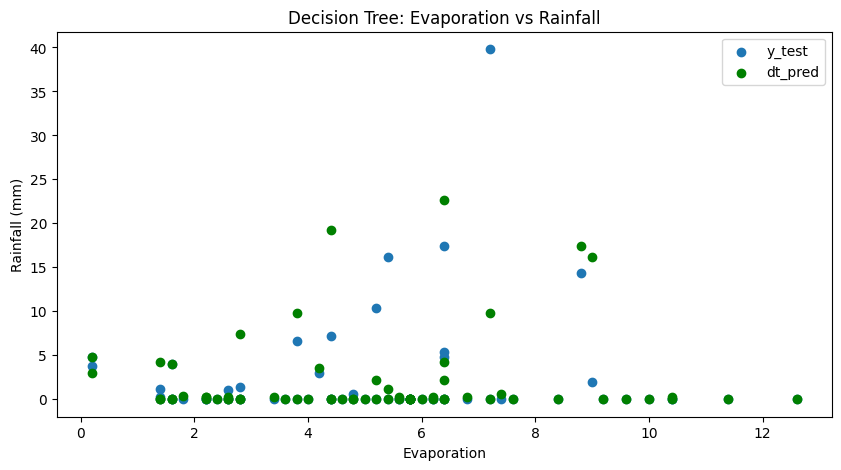

In [55]:
if "Evaporation" in X_test.columns:
    # Linear Regression
    plt.figure(figsize=(10,5))
    plt.scatter(X_test["Evaporation"], y_test, label="y_test")
    plt.scatter(X_test["Evaporation"], lr_pred, c="y", label="lr_pred")
    plt.title("Linear Regression: Evaporation vs Rainfall")
    plt.xlabel("Evaporation"); plt.ylabel("Rainfall (mm)")
    plt.legend(); plt.show()

    # Random Forest
    plt.figure(figsize=(10,5))
    plt.scatter(X_test["Evaporation"], y_test, label="y_test")
    plt.scatter(X_test["Evaporation"], rf_pred, c="orange", label="rf_pred")
    plt.title("Random Forest: Evaporation vs Rainfall")
    plt.xlabel("Evaporation"); plt.ylabel("Rainfall (mm)")
    plt.legend(); plt.show()

    # Decision Tree
    plt.figure(figsize=(10,5))
    plt.scatter(X_test["Evaporation"], y_test, label="y_test")
    plt.scatter(X_test["Evaporation"], dt_pred, c="g", label="dt_pred")
    plt.title("Decision Tree: Evaporation vs Rainfall")
    plt.xlabel("Evaporation"); plt.ylabel("Rainfall (mm)")
    plt.legend(); plt.show()
else:
    print("주의: 'Evaporation' 컬럼이 없어 산점도를 생략합니다.")